# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import plotly.express as px

## Importing the dataset

In [2]:
dataset = pd.read_csv('/Users/rdesh723/Desktop/ML_Codes/Datasets/contested_shots.csv')
dataset=dataset.fillna(0)

dataset=dataset[(dataset['CONTESTED_SHOTS']>100)]
X = dataset.iloc[:, [1,2]].values

dataset

,PLAYER_NAME,CONTESTED_SHOTS,DEF_RIM_FG_PCT,2023_24
0,Brook Lopez,1234,0.532,"$25,000,000"
1,Chet Holmgren,951,0.524,"$10,386,000"
2,Anthony Davis,849,0.540,"$40,600,080"
3,Rudy Gobert,834,0.520,"$41,000,000"
4,Jarrett Allen,738,0.559,"$20,000,000"
...,...,...,...,...
301,Bol Bol,105,0.452,"$2,165,000"
302,Davis Bertans,104,0.673,"$17,000,000"
303,Noah Clowney,102,0.576,"$3,089,460"
304,Jalen McDaniels,101,0.821,"$4,516,000"


In [3]:
len(X)

306

## Using the elbow method to find the optimal number of clusters

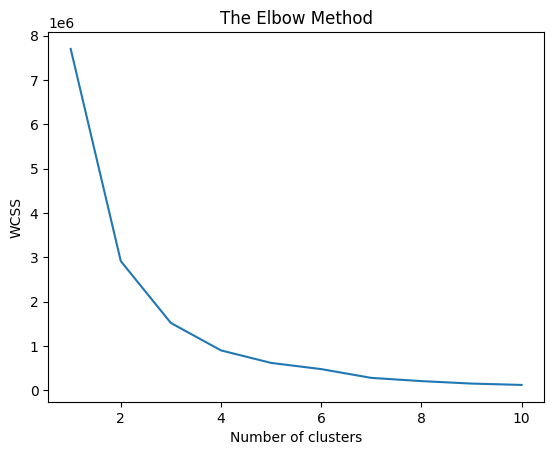

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 41)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
len(y_kmeans)

306

## Visualising the clusters

In [9]:
X_DF=pd.DataFrame(X)
X_DF.columns=['CONTESTED_SHOTS_','DEF_RIM_FG_PCT_']

In [10]:
Final=X_DF.merge(dataset,left_on=["CONTESTED_SHOTS_",'DEF_RIM_FG_PCT_'], right_on=["CONTESTED_SHOTS",'DEF_RIM_FG_PCT'])
Final=Final[["CONTESTED_SHOTS_",'DEF_RIM_FG_PCT_',"PLAYER_NAME","2023_24"]]
Final.columns=["CONTESTED_SHOTS_",'DEF_RIM_FG_PCT_',"PLAYER_NAME","Salary"]

Final["value"]=y_kmeans
Final

,CONTESTED_SHOTS_,DEF_RIM_FG_PCT_,PLAYER_NAME,Salary,value
0,1234.0,0.532,Brook Lopez,"$25,000,000",2
1,951.0,0.524,Chet Holmgren,"$10,386,000",2
2,849.0,0.540,Anthony Davis,"$40,600,080",2
3,834.0,0.520,Rudy Gobert,"$41,000,000",2
4,738.0,0.559,Jarrett Allen,"$20,000,000",2
...,...,...,...,...,...
301,105.0,0.452,Bol Bol,"$2,165,000",1
302,104.0,0.673,Davis Bertans,"$17,000,000",1
303,102.0,0.576,Noah Clowney,"$3,089,460",1
304,101.0,0.821,Jalen McDaniels,"$4,516,000",1


In [11]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
fig=px.scatter(Final[Final['value']==0], x="DEF_RIM_FG_PCT_", y="CONTESTED_SHOTS_", color_discrete_sequence=['red'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )

fig2=px.scatter(Final[Final['value']==1], x="DEF_RIM_FG_PCT_", y="CONTESTED_SHOTS_", color_discrete_sequence=['blue'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )

fig3=px.scatter(Final[Final['value']==2], x="DEF_RIM_FG_PCT_", y="CONTESTED_SHOTS_", color_discrete_sequence=['orange'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )
fig4=px.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color_discrete_sequence=['yellow'],
        height=1000, width=1000,
        )
fig4.update_traces(marker=dict(size=20))

fig.add_traces(
    list(fig2.select_traces())
)

fig.add_traces(
    list(fig3.select_traces())
)

fig.add_traces(
    list(fig4.select_traces())
)

fig.update_layout(
    xaxis_title="DEFENSIVE RIM FG%",
    yaxis_title="CONTESTED SHOTS",
)
# fig.update_layout(xaxis_range=[0,1])
